In [1]:
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

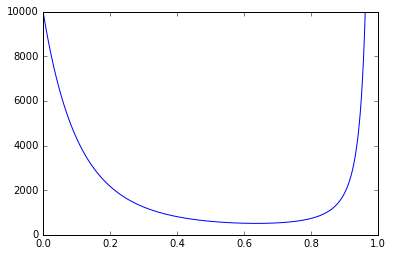

CSTR volume = 174.906985673L
PFR volume = 304.363386194L


In [2]:
"""1 a)"""
CAo = 0.1
CBo = 0.1
CA = np.linspace(CAo,0.00001,1001)
CB = CA
Q = 2
E = 10000*4.184
R = 8.314
Hrxn = -6000 #cal/mol
CPa = CPb = 15 #cal/mol.K
To = 300 #K 
ko = 192865.363 #l/mol.s
x = (CAo - CA)/CAo
T = To - Hrxn*CAo*Q*x/(CAo*Q*CPa + CBo*Q*CPb)
k = ko*np.exp(-E/(R*T))
ra = k*CA*CB
plt.ylim([0,10000])
plt.plot(x,1/ra)
plt.show()
CA[850]
V_c = Q*(CAo - CA[850])*(1/ra[850])
print ('CSTR volume = ' +str(V_c) + 'L')

V_p = np.trapz(1/ra[:850],x[:850])*CAo*Q
print ('PFR volume = ' +str(V_p) + 'L')

# plt.plot(x[:850],1/ra[:850])

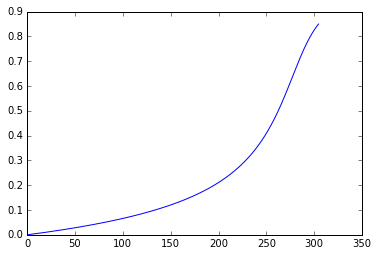

CSTR volume = 175.054969633L
PFR volume = 304.58L


In [12]:
"""1 a)"""
"""CSTR"""
CAo = 0.1
CBo = 0.1
Q = 2
FAo = CAo*Q
FBo = CBo*Q
X = 0.85
FA = FB = FAo*(1-X)
ko = 192865.363 #l/mol.s
To = 300 #K
Hrxn = -6000 #cal/mol
CPa = CPb = 15 #cal/mol.K
E = 10000*4.184
R = 8.314
T = 470
k = ko*np.exp(-E/(R*T))
def CSTR(V):
    eqn1 = FAo - FA - k*(FA/Q)*(FB/Q)*V
    return (eqn1)

V_c = fsolve(CSTR,[150])

"""PFR"""
To = 300
Qo = 2

def PFR(Z,V):
    FA,FB,T = Z
    k = ko*np.exp(-E/(R*T))
    dFadV = -k*(FA/Q)*(FB/Q)
    dFbdV = -k*(FA/Q)*(FB/Q)
    dTdV = dFadV*Hrxn/(FAo*CPa + FBo*CPb)
    return (dFadV,dFbdV,dTdV)


Vspan =np.linspace(0,304.58,3001)
ANS = odeint(PFR,[FAo,FBo,To],Vspan)
Temp = ANS[:,2]
FAi = ANS[:,0]
X_pfr = (FAo - FAi)/FAo
plt.plot(Vspan,X_pfr)
V_p  = np.interp(0.85,X_pfr,Vspan)
plt.show()

print ('CSTR volume = ' +str(V_c[0]) + 'L')
print ('PFR volume = ' +str(V_p) + 'L')

In [4]:
"""1 b)"""
CAo = 0.1
CA = np.linspace(CAo,0.00001,1001)
CB = CA
x = (CAo - CA)/CAo
Hrxn = -6000 #cal/mol
CPa = CPb = 15 #cal/mol.K
Tout = 550 #K
# def temp(T):
    
Tin = Tout + Hrxn*CAo*Q*x/(CAo*Q*CPa + CBo*Q*CPb)

print ('Max inlet Temp = ' + str(Tin[-1]))

Max inlet Temp = 350.02


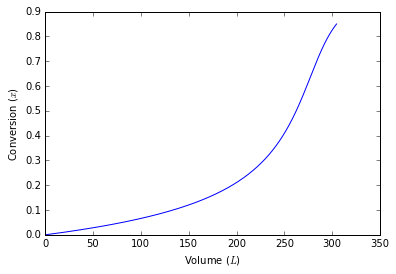

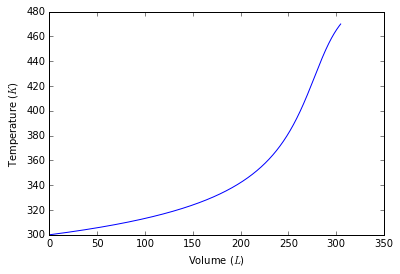

In [13]:
"""1 c)"""

plt.plot(Vspan,X_pfr)
plt.ylabel('Conversion ($x$)')
plt.xlabel('Volume ($L$)')
plt.show()

plt.plot(Vspan,Temp)
plt.ylabel('Temperature ($K$)')
plt.xlabel('Volume ($L$)')
plt.show()

In [14]:
"""1 d)"""

"""CSTR"""
CAo = 0.1
CBo = 0.1
Q = 2
FAo = CAo*Q
FBo = CBo*Q
X = 0.85
FA = FB = FAo*(1-X)
ko = 192865.363 #l/mol.s
To = 300 #K
Hrxn = -6000 #cal/mol
CPa = CPb = 15 #cal/mol.K
E = 10000*4.184
R = 8.314
T = 470
k = ko*np.exp(-E/(R*T))
def CSTR_500(x):
    FA = FAo*(1-x)
    T = To - Hrxn*CAo*Q*x/(CAo*Q*CPa + CBo*Q*CPb)
    k = ko*np.exp(-E/(R*T))
    V = 500
    eqn1 = FAo - FA - k*(FA/Q)*(FB/Q)*V
    return (eqn1)

X_500 = fsolve(CSTR_500,[0.9])
print ('X with 500l = ' +str(X_500[0]))

def CSTR_250_1(x):
    FA = FAo*(1-x)
    T = To - Hrxn*CAo*Q*x/(CAo*Q*CPa + CBo*Q*CPb)
    k = ko*np.exp(-E/(R*T))
    V = 250
    eqn1 = FAo - FA - k*(FA/Q)*(FB/Q)*V
    return (eqn1)

X_250_1 = fsolve(CSTR_250_1,[0.5])

FAo2 = FAo*(1-X_250_1)
def CSTR_250_2(x):
    FA = FAo2*(1-x)
    T = To - Hrxn*CAo*Q*x/(CAo*Q*CPa + CBo*Q*CPb)
    k = ko*np.exp(-E/(R*T))
    V = 250
    eqn1 = FAo2 - FA - k*(FA/Q)*(FB/Q)*V
    return (eqn1)

X_250_2 = fsolve(CSTR_250_2,[0.9])

print ('X with two 250l = ' +str(X_250_2[0]))

X with 500 l = 0.963671105682
X with two 250 l = 0.915336159712


X with CAo(0.1) = 0.423545982634


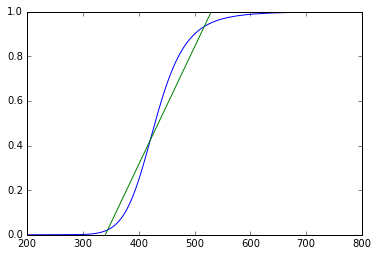

In [16]:
"""2 a)"""

"""CSTR"""
CAo = 0.1
Q = 2
FAo = CAo*Q
ko = 20000 #1/s
To = 340 #K
Hrxn = -30000 #J/mol
CPa = CPb = 157.9 #J/mol.K
E = 55000 #J/mol
R = 8.314

def CSTR(x):
    FA = FAo*(1-x)
    T = To - Hrxn*FAo*x/(FAo*CPa)
    k = ko*np.exp(-E/(R*T))
    V = 500
    eqn1 = FAo - FA - k*(FA/Q)*V
    return (eqn1)

X_500 = fsolve(CSTR,[0.5])
print ('X with CAo(0.1) = ' +str(X_500[0]))


CA = np.linspace(0.099999999,0.0000000001,1001)
X = (CAo - CA)/CAo
Theat = To - Hrxn*FAo*X/(FAo*CPa)
V = 500
def mole(T,X):
    FA = FAo*(1-X)
    ln = np.log((FAo - FA)/(ko*(FA/Q)*V))
    eqn1 = T + E/(R*ln)
    return (eqn1)
Tmole = []
T = 350
for x in X:
    T = fsolve(mole,[T],args = (x))
    Tmole.append(T[0])

plt.plot(Tmole,X)
plt.plot(Theat,X)
plt.xlim([200,800])
plt.show()

X with CAo(0.8) = 0.977163041052


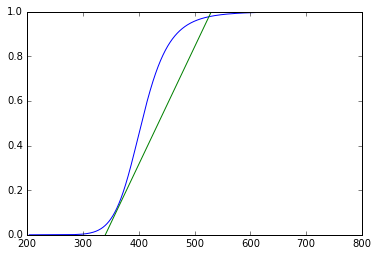

In [22]:
"""b)"""
CAo = 0.1
Q = 0.8
FAo = CAo*Q
ko = 20000 #1/s
To = 340 #K
Hrxn = -30000 #J/mol
CPa = CPb = 157.9 #J/mol.K
E = 55000 #J/mol
R = 8.314

def CSTR(x):
    FA = FAo*(1-x)
    T = To - Hrxn*FAo*x/(FAo*CPa)
    k = ko*np.exp(-E/(R*T))
    V = 500
    eqn1 = FAo - FA - k*(FA/Q)*V
    return (eqn1)

Xnew = fsolve(CSTR,[0.9])
print ('X with CAo(0.8) = ' +str(Xnew[0]))

CA = np.linspace(CAo-0.00000001,00.00000001,1001)
X = (CAo - CA)/CAo
Theat = To - Hrxn*FAo*X/(FAo*CPa)
V = 500
def mole(T,X):
    FA = FAo*(1-X)
    ln = np.log((FAo - FA)/(ko*(FA/Q)*V))
    eqn1 = T + E/(R*ln)
    return (eqn1)
Tmole = []
T = 350
for x in X:
    
    T = fsolve(mole,[T],args = (x))
    Tmole.append(T[0])

plt.plot(Tmole,X)
plt.plot(Theat,X)
plt.xlim([200,800])
plt.show()

X with CAo(0.1) = 0.962236703168


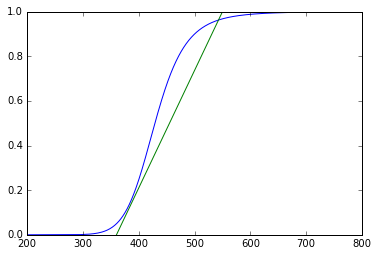

In [25]:
"""2 c)"""
CAo = 0.1
Q = 2
FAo = CAo*Q
ko = 20000 #1/s
To = 360 #K
Hrxn = -30000 #J/mol
CPa = CPb = 157.9 #J/mol.K
E = 55000 #J/mol
R = 8.314

def CSTR(x):
    FA = FAo*(1-x)
    T = To - Hrxn*FAo*x/(FAo*CPa)
    k = ko*np.exp(-E/(R*T))
    V = 500
    eqn1 = FAo - FA - k*(FA/Q)*V
    return (eqn1)

X_500 = fsolve(CSTR,[0.8])
print ('X with CAo(0.1) = ' +str(X_500[0]))


CA = np.linspace(0.099999999,0.0000000001,1001)
X = (CAo - CA)/CAo
Theat = To - Hrxn*FAo*X/(FAo*CPa)
V = 500
def mole(T,X):
    FA = FAo*(1-X)
    ln = np.log((FAo - FA)/(ko*(FA/Q)*V))
    eqn1 = T + E/(R*ln)
    return (eqn1)
Tmole = []
T = To
for x in X:
    
    T = fsolve(mole,[T],args = (x))
    Tmole.append(T[0])

plt.plot(Tmole,X)
plt.plot(Theat,X)
plt.xlim([200,800])
plt.show()

X with CAo(0.1) = 0.00312961710746


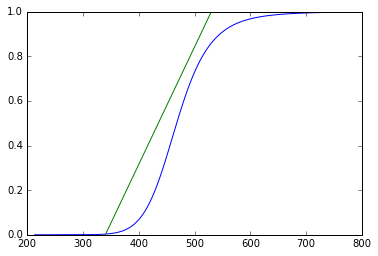

In [9]:
CAo = 0.1
Q = 2
FAo = CAo*Q
ko = 20000 #1/s
To = 340 #K
Hrxn = -30000 #J/mol
CPa = CPb = 157.9 #J/mol.K
E = 60000 #J/mol
R = 8.314

def CSTR(x):
    FA = FAo*(1-x)
    T = To - Hrxn*FAo*x/(FAo*CPa)
    k = ko*np.exp(-E/(R*T))
    V = 500
    eqn1 = FAo - FA - k*(FA/Q)*V
    return (eqn1)

X_500 = fsolve(CSTR,[0.75])
print ('X with CAo(0.1) = ' +str(X_500[0]))


CA = np.linspace(0.099999999,0.0000000001,1001)
X = (CAo - CA)/CAo
Theat = To - Hrxn*FAo*X/(FAo*CPa)
V = 500
def mole(T,X):
    FA = FAo*(1-X)
    ln = np.log((FAo - FA)/(ko*(FA/Q)*V))
    eqn1 = T + E/(R*ln)
    return (eqn1)
Tmole = []
T = 350
for x in X:
    
    T = fsolve(mole,[T],args = (x))
    Tmole.append(T[0])

plt.plot(Tmole,X)
plt.plot(Theat,X)
plt.xlim([200,800])
plt.show()

Tu for x: 0.93 = 513.874484951 K


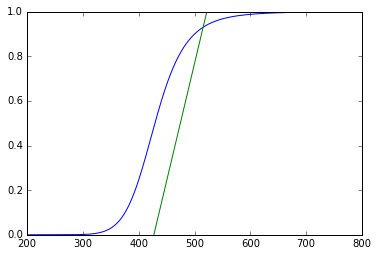

In [10]:
CAo = 0.1
Q = 2
V = 500
FAo = CAo*Q
ko = 20000 #1/s
To = 340 #K
Hrxn = -30000 #J/mol
CPa = CPb = 157.9 #J/mol.K
E = 55000 #J/mol
R = 8.314
UA = 31.6 #J/s.m^2
def CSTR(Tu):
    x = 0.93
    FA = FAo*(1-x)
    T = -Hrxn*FAo*x/(FAo*CPa + UA) + (FAo*CPa*To + UA*Tu)/(FAo*CPa + UA)
    k = ko*np.exp(-E/(R*T))
    eqn1 = FAo - FA - k*(FA/Q)*V
    return (eqn1)

TU = fsolve(CSTR,[800])
print ('Tu for x: 0.93 = ' +str(TU[0]) + ' K')


CA = np.linspace(0.099999999,0.0000000001,1001)
X = (CAo - CA)/CAo
Theat = -Hrxn*FAo*X/(FAo*CPa + UA) + (FAo*CPa*To + UA*TU)/(FAo*CPa + UA)
V = 500
def mole(T,X):
    FA = FAo*(1-X)
    ln = np.log((FAo - FA)/(ko*(FA/Q)*V))
    eqn1 = T + E/(R*ln)
    return (eqn1)
Tmole = []

for x in X:
    
    T = fsolve(mole,[T],args = (x))
    Tmole.append(T[0])

plt.plot(Tmole,X)
plt.plot(Theat,X)
plt.xlim([200,800])
plt.show()

In [11]:
"""3"""
def func(d):
    print ("Diameter  = "  + str(d)  + "mm")
    D = d/1000 #m
    Do = 30/1000 #m
    A = (np.pi/4)*D**2
    Ao = (np.pi/4)*Do**2
    Po = 2
    ko = 700
    E = 40000
    R = 8.314e-5
    K = 0.02*(Ao/A)**2
    W = 700/200 #kg
    Cpa = 500
    Cpb = 250
    Hrx = -47500
    U = 200
    rho_bed = 800 #kg/m3
    Tu = 298.15 #K
    To = 423.15 #K
    Fto = FAo = 400/3600/200*1000
    a = 4/(D*rho_bed)
    z = W/rho_bed/A
    def PBR(F,z):
        FA, FB, P, T = F
        Ft = (FA + FB)
        Q = Ft*R*T/P 
        k = ko*np.exp(-E/(8.314*T))
        ra = -k*(FA/Q)
        dFadz = ra*rho_bed*A
        dFbdz = -2*dFadz
        dPdz = -K*(Po*Ft*T)/(P*Fto*To)
        dTdz = rho_bed*A*(U*a*(Tu - T) + ra*Hrx)/(FAo*Cpa)
        return (dFadz,dFbdz,dPdz,dTdz)

    zspan = np.linspace(0,z,1000)
    F = odeint(PBR,[FAo, 0, Po, To],zspan)
    Fa = F[:,0]
    P = F[:,2]
    T = F[:,3]
    X = (FAo- Fa)/FAo
#     plt.plot(zspan,P)
#     plt.show()
#     plt.plot(zspan,X)
#     plt.show()
#     plt.plot(zspan,T)
#     plt.show()
    print ("T = " + str(max(T) - 273.15))
    print ("P = " + str(P[-1]))
    print ("x = " + str(X[-1]))
    print ()
    
func(30)
func(25)
func(28)

Diameter  = 30mm
T = 200.14732059
P = 1.74844407988
x = 0.97517961734

Diameter  = 25mm
T = 191.944407961
P = 1.13331136622
x = 0.941400546928

Diameter  = 28mm
T = 197.296636172
P = 1.60920567104
x = 0.967192730388

